In [1]:
"""
General workflow for importing a new session
"""
%load_ext autoreload
%autoreload 2

subject = 'P01' # TODO: change this for each subject
verbose = True  # change this for debugging

import matplotlib
%matplotlib inline

from pipeline import Pipeline
settings = dict(debug=False, mne_log_level='Info', sfreq=64) # optional pipeline settings
pipeline = Pipeline(subject, settings)

debugging !??


In [2]:
pipeline.load_raw(verbose=verbose)
print('done')

Opening raw data file /Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/mne/P01-raw.fif...
Isotrak not found
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
done


540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]


/Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/pipeline.py:297: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(trial_events, raw.info['sfreq'], raw.first_samp, axes=axes)


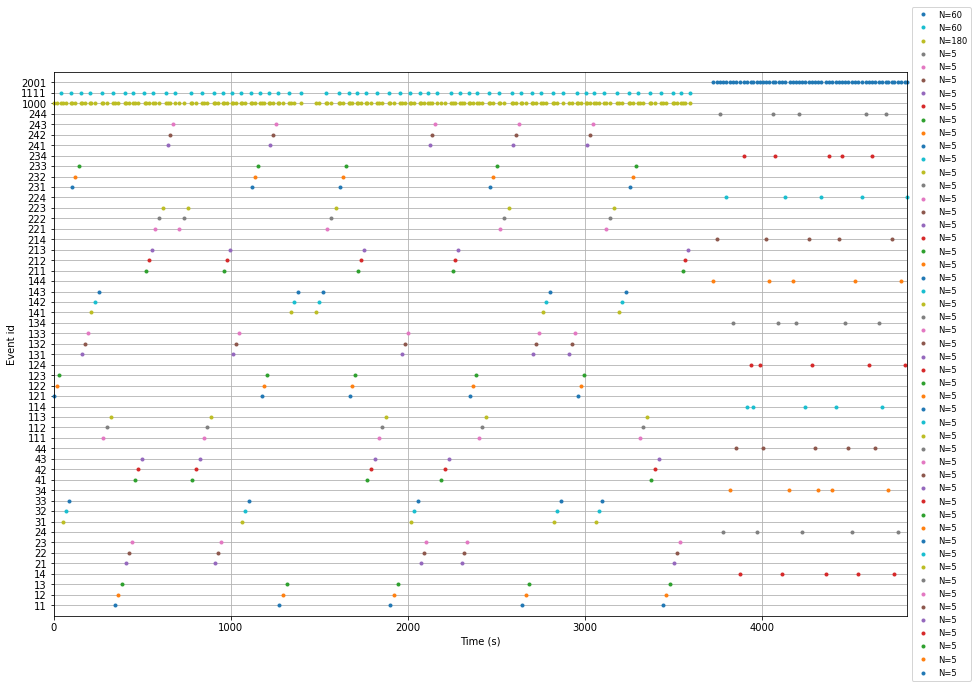

('1st event at ', 1.0)
('last event at ', 4820.166015625)
540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]


/Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/pipeline.py:320: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(merged_events, raw.info['sfreq'], raw.first_samp, axes=axes)


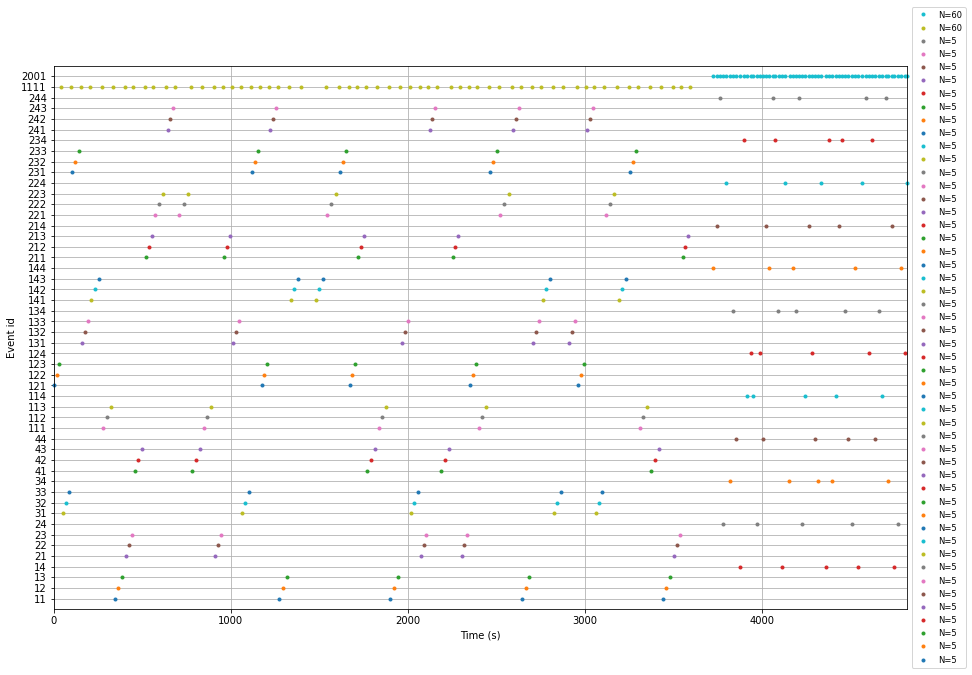

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]
360 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]


In [3]:
pipeline.check_trial_events()
pipeline.check_trial_audio_onset_merge(use_audio_onsets=True, verbose=None)
pipeline.merge_trial_and_audio_onsets()

In [16]:
pipeline.bandpass_filter()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (6.604 sec)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (6.604 sec)

<Epochs |  8140 events (all good), -0.199219 - 0.800781 sec, baseline -0.199219 – 0 sec, ~2.15 GB, data loaded,
 '10000': 8140>


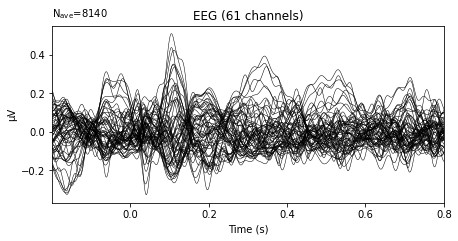

In [4]:
%matplotlib inline
pipeline.bandpass_filter()
pipeline.generate_beat_events() # Note: this includes cue-beats !!!
pipeline.beat_epochs.average().plot();

Using EOG channels: EXG1, EXG2, EXG3, EXG4
EOG channel index for this subject is: [64 65 66 67]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 1579 significant peaks
Number of EOG events detected: 1579


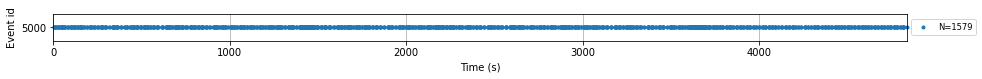

In [5]:
pipeline.find_eog_events()

In [ ]:
%matplotlib tk
#pipeline.compute_ica()
pipeline.plot_events_raw()

In [7]:
pipeline.alt_downsample()

360 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]
360 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]


In [ ]:
%matplotlib tk
pipeline.plot_events_raw()

360 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]


/Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/pipeline.py:545: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(resampled_trial_events, raw.info['sfreq'], raw.first_samp, axes=axes) #, color=color, event_id=event_id)


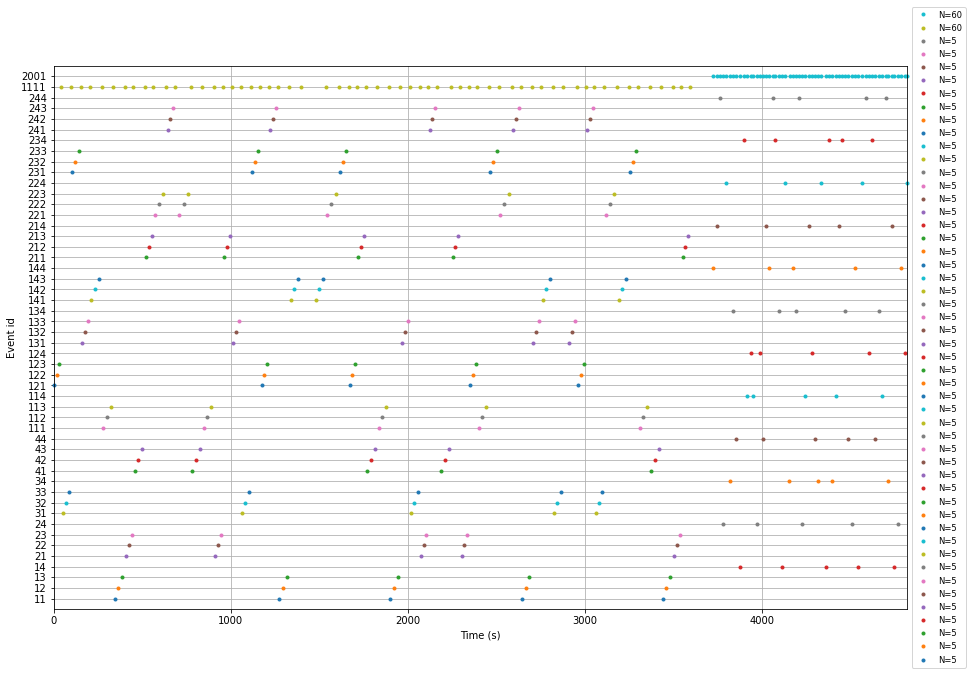

event onset jitter (min, mean, max): -0.01171875 -0.003917100694444444 0.00390625
pp popo


In [9]:
pipeline.check_resampled_trial_events()

In [16]:
pipeline.compute_ica()

Fitting ICA to data using 61 channels (please be patient, this may take a while)


/Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/pipeline.py:585: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  # ica = ICA(n_components=20, method='fastica', random_state=random_state)
/Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/pipeline.py:590: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  


Selecting by number: 20 components
Fitting ICA took 12.5s.


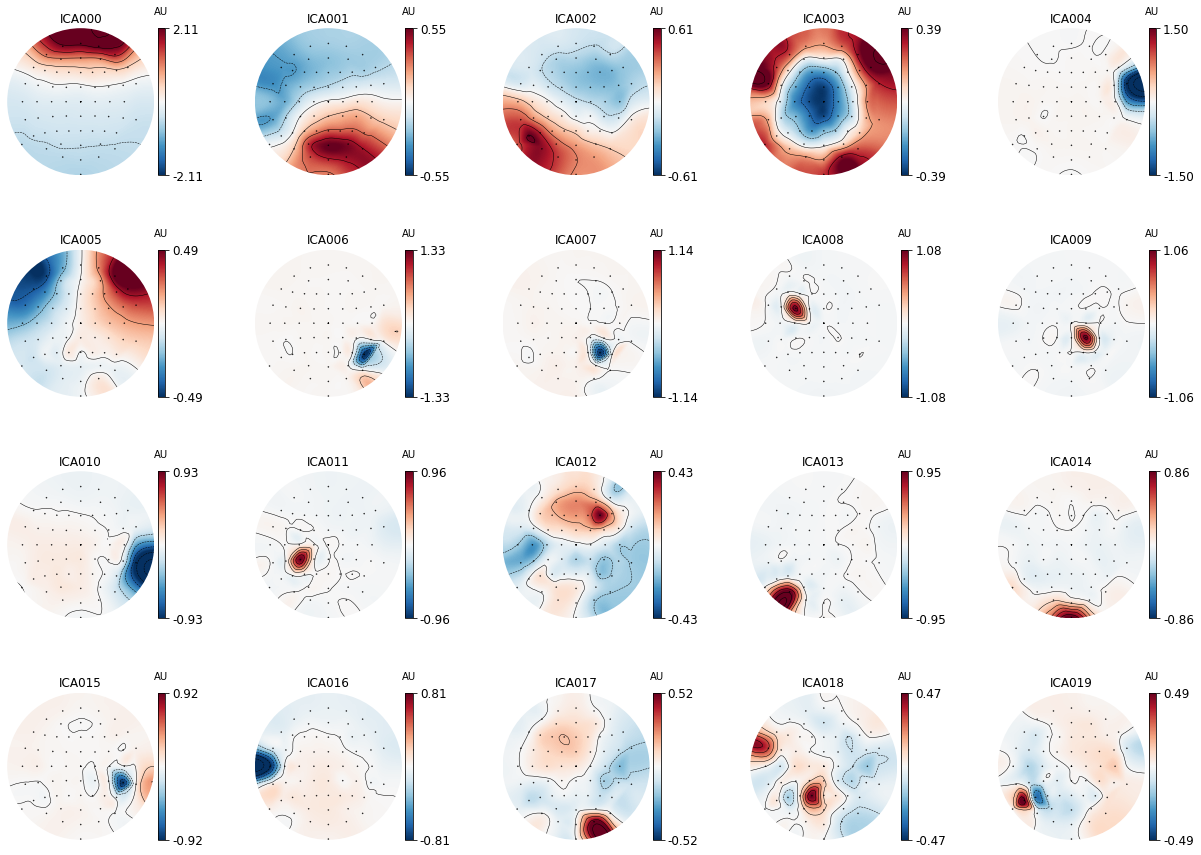

In [17]:
pipeline.plot_ica_components()

Using EOG channel: EXG1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 640 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


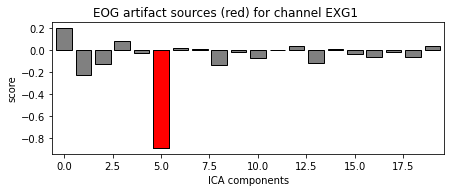

Using EOG channel: EXG2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 640 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


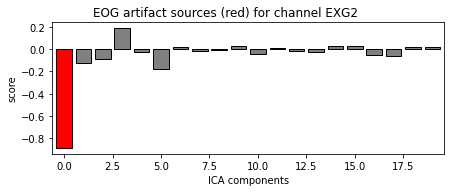

Using EOG channel: EXG3
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 640 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


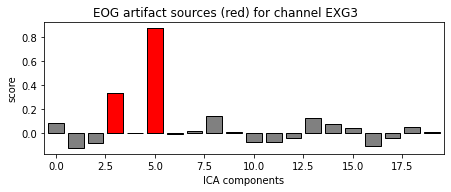

Using EOG channel: EXG4
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 640 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


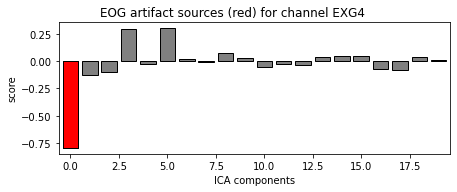

('suggested EOG artifact channels: ', [0, 3, 5])
('EOG artifact component scores: ', array([0.88619607, 0.33121325, 0.88564573]))


In [18]:
pipeline.find_eog_artifact_sources()

In [19]:
pipeline.auto_detect_artifact_components()

    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    6, 6, 17
    Removing duplicate indices...
Ready.
('merging', [[0, 3, 5], [17, 6]])


('suggested channels to reject (selection="auto"): ', [0, 3, 5, 6, 17])
To change the component selection, specify select=[...] (component numbers) or select=N (top-N) and run this command again!


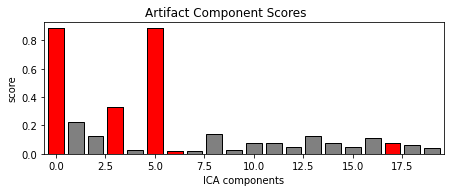

('current selection:', [0, 3, 5, 6, 17])


In [20]:
pipeline.select_artifact_sources(selection="auto")

In [ ]:
pipeline.exclude_ica_components(selection=[0,3,5,6,17])